In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(-0.5, 422.5, 332.5, -0.5)

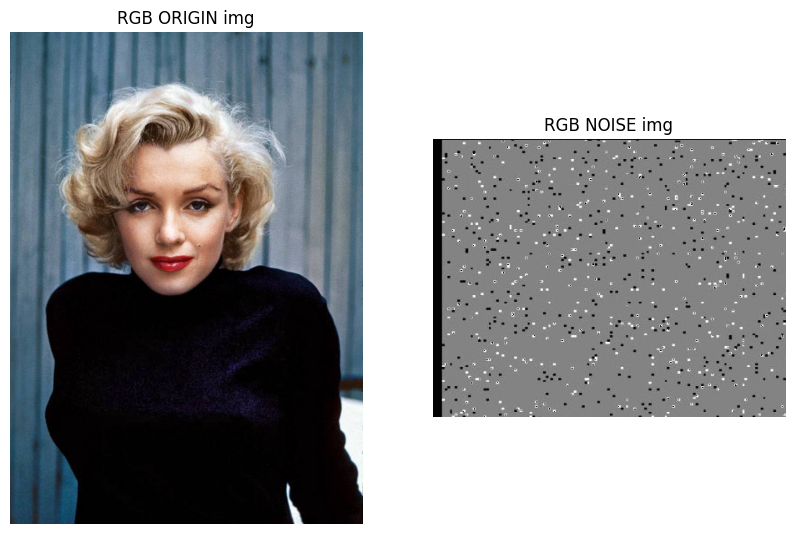

In [ ]:
# 원본영상과 salt&pepper 잡음 영상을 불러와 RGB 이미지로 바꿔준다.
img=cv2.imread('/content/gdrive/My Drive/Images/marilynmonroe_color.jpg')
img2=-cv2.imread('/content/gdrive/My Drive/Images/Salt-and-Pepper-noise.png')

RGB_ORIGIN_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
RGB_NOISE_img=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10)) # 영상 크기 변환
plt.subplot(1,2,1)
plt.title("RGB ORIGIN img")
plt.imshow(RGB_ORIGIN_img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("RGB NOISE img")
plt.imshow(RGB_NOISE_img)
plt.axis("off")

(1139, 815, 3)
(1139, 815, 3)


(-0.5, 814.5, 1138.5, -0.5)

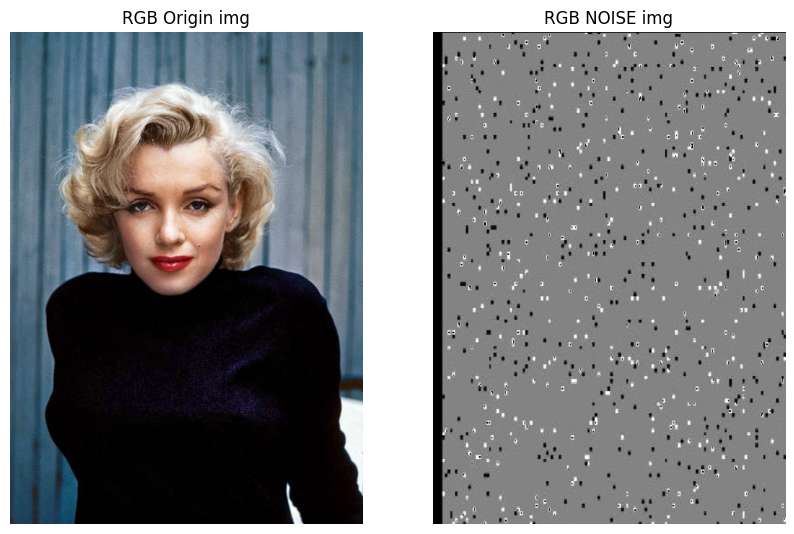

In [ ]:
# 두 영상의 크기를 맞춰준다.
target_size = (RGB_ORIGIN_img.shape[1], RGB_ORIGIN_img.shape[0]) # target_size는 원본영상의 크기
RGB_NOISE_img=cv2.resize(RGB_NOISE_img,dsize=(target_size),interpolation=cv2.INTER_NEAREST)

# 확인
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("RGB Origin img")
plt.imshow(RGB_ORIGIN_img)
print(RGB_ORIGIN_img.shape)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("RGB NOISE img")
plt.imshow(RGB_NOISE_img)
print(RGB_NOISE_img.shape)
plt.axis("off")

(-0.5, 814.5, 1138.5, -0.5)

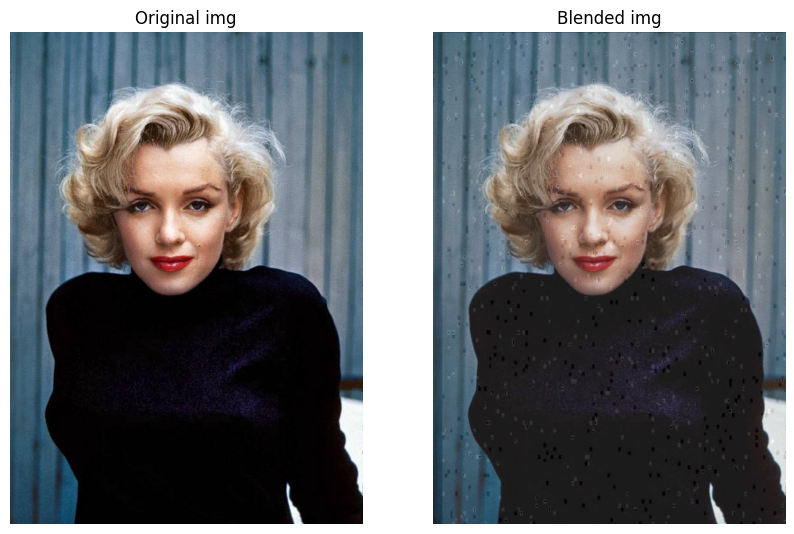

In [150]:
# 잡음이 있는 영상을 다루기 위해 두 영상을 가중치 결합하여준다.
W=0.8
Blended_img=cv2.addWeighted(RGB_ORIGIN_img,W,RGB_NOISE_img,1-W,0)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Original img")
plt.imshow(RGB_ORIGIN_img)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Blended img")
plt.imshow(Blended_img)
plt.axis("off")

(-0.5, 814.5, 1138.5, -0.5)

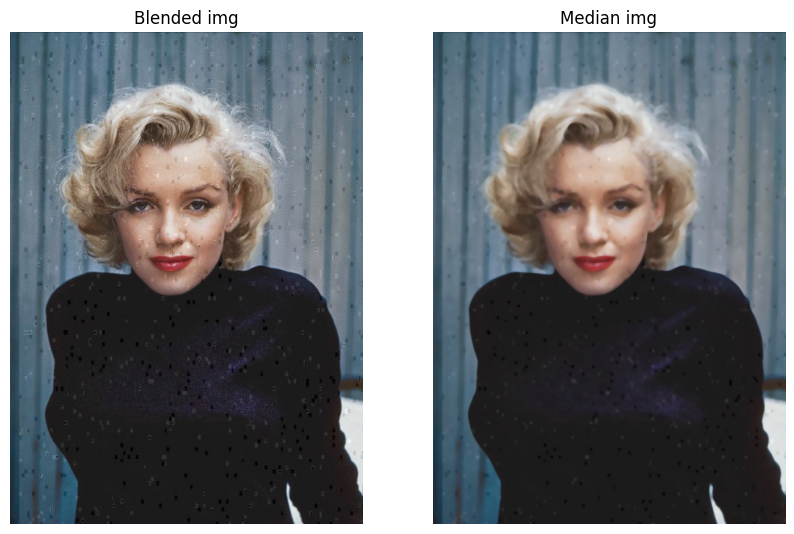

In [ ]:
# salt&pepper 잡음이 있는 영상에 대해 화질향상을 진행한다
# 중간값 필터링
MEDIAN_img=cv2.medianBlur(Blended_img,9) # 커널은 7로 설정

# 확인
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Blended img")
plt.imshow(Blended_img)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Median img")
plt.imshow(MEDIAN_img)
plt.axis("off")

(-0.5, 814.5, 1138.5, -0.5)

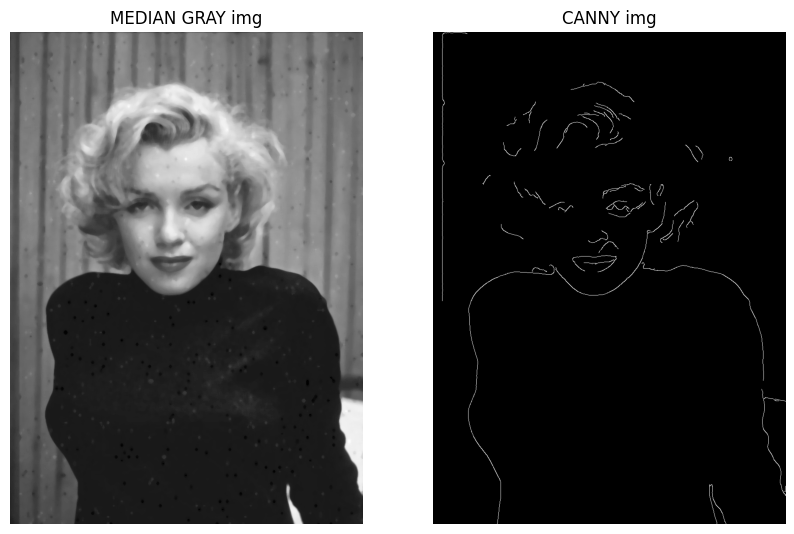

In [ ]:
# 잡음에 민감하지 않은 Canny 에지검출도 진행해본다.
# RGB이미지인 MEDIAN_img를 그레이스케일로 변환하여 에지검출을 수행한다.
MEDIAN_GRAY_img=cv2.cvtColor(MEDIAN_img,cv2.COLOR_RGB2GRAY)
CANNY_img=cv2.Canny(MEDIAN_GRAY_img,50,150)

# 그레이영상과 에지영상 확인
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("MEDIAN GRAY img")
plt.imshow(MEDIAN_GRAY_img,cmap='gray')
plt.axis("off")
plt.subplot(1,2,2)
plt.title("CANNY img")
plt.imshow(CANNY_img,cmap='gray')
plt.axis("off")

(-0.5, 814.5, 1138.5, -0.5)

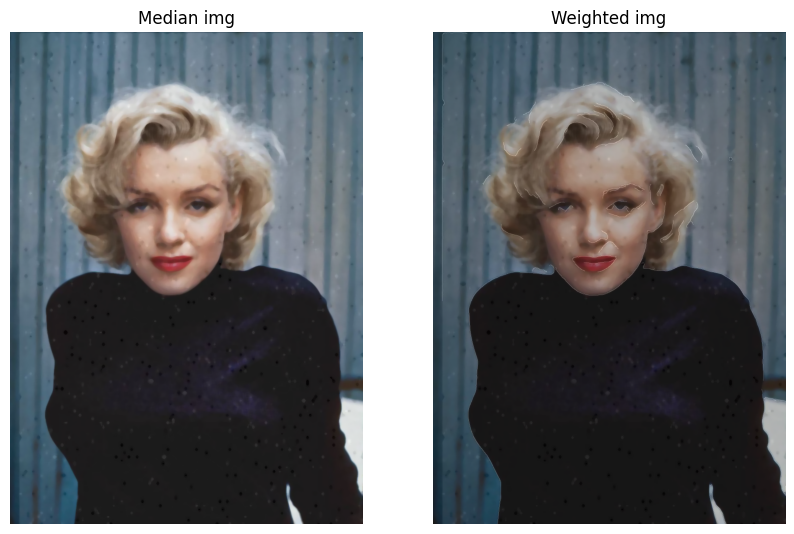

In [ ]:
# 에지영상과 화질향상 시켜준 RGB영상을 더해주어 에지를 강조해본다.
# 에지를 RGB영상으로
CANNY_RGB_img=cv2.cvtColor(CANNY_img,cv2.COLOR_GRAY2RGB)
Weighted_img=cv2.addWeighted(MEDIAN_img,0.8,CANNY_RGB_img,0.2,0)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Median img")
plt.imshow(MEDIAN_img)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Weighted img")
plt.imshow(Weighted_img)
plt.axis("off")

(-0.5, 814.5, 1138.5, -0.5)

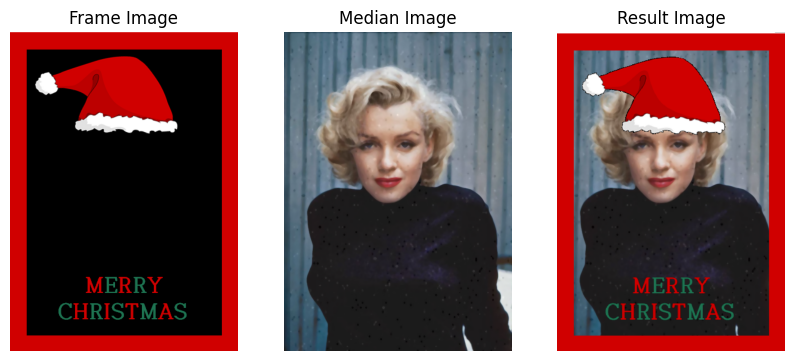

In [ ]:
# 중간값 필터링을 적용한 이미지(화질향상된 이미지)와 마스크를 씌운 프레임 영상을 결합하기
# 마스크 영상을 불러온다.
frame_img=cv2.imread('/content/gdrive/My Drive/Images/merry christmas mask frame.png')
frame_img=cv2.cvtColor(frame_img,cv2.COLOR_BGR2RGB)
MEDIAN_img=cv2.cvtColor(MEDIAN_img,cv2.COLOR_BGR2RGB)
# 두 영상의 크기를 맞춰준다.
target_size = (MEDIAN_img.shape[1], MEDIAN_img.shape[0]) # target_size는 원본영상의 크기
result_img=cv2.resize(frame_img,dsize=(target_size),interpolation=cv2.INTER_NEAREST)

# 마스크영상의 검은부분을 추출해준다.
black_pixels=((result_img[:,:,0]==0) &(result_img[:,:,1]==0) & (result_img[:,:,2]==0))

# 마스크영상의 검은부분을 MEDIAN_img로 바꿔준다.
result_img[black_pixels,:]=MEDIAN_img[black_pixels,:]

# 마스크 영상과 변화된 영상 확인
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Frame Image") # 마스크영상
plt.imshow(frame_img)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Median Image") # Median_img 영상
plt.imshow(MEDIAN_img)
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Result Image") # 최종 결과물인 결합된 영상
plt.imshow(result_img)
plt.axis("off")